In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install konlpy

%cd /usr/local/lib/python3.8/dist-packages/konlpy/java

!jar xvf /usr/local/lib/python3.8/dist-packages/konlpy/java/open-korean-text-2.1.0.jar

with open(f"/usr/local/lib/python3.8/dist-packages/konlpy/java/org/openkoreantext/processor/util/noun/names.txt") as f:
    data = f.read()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.6/465.6 KB 13.9 MB/s eta 0:00:00
/usr/local/lib/python3.8/dist-packages/konlpy/java
  created: META-INF/
 inflated: META-INF/MANIFEST.MF
  created: org/
  created: org/openkoreantext/
  created: org/openkoreantext/processor/
  created: org/openkoreantext/processor/normalizer/
  created: org/openkoreantext/processor/phrase_extractor/
  created: org/openkoreantext/processor/qa/
  created: org/openkoreantext/processor/stemmer/
  created: org/openkoreantext/processor/tokenizer/
  created: org/openkoreantext/processor/tools/
  created: org/openkoreantext/processor/util/
  created: org/openkoreantext/processor/util/adjective/
  created: org/openkoreantext/processor/util/adverb/
  created: org/openkoreantext/processor/util/auxiliary/
  created: org/openkoreantext/proce

In [3]:
data += '여기어때\n데일리호텔\n야놀자\n인터파크투어\n마이리얼트립\n호텔스닷컴\n익스피디아\n에어비앤비\n부킹닷컴\n트리바고\n스카이스캐너\n호텔스컴파인\n아고다\n가성비\n코로나\n최저가\n본인인증\n체크인\n체크아웃\n카카오톡'

with open("/usr/local/lib/python3.8/dist-packages/konlpy/java/org/openkoreantext/processor/util/noun/names.txt", 'w') as f:
    f.write(data)

In [4]:
!jar cvf /usr/local/lib/python3.8/dist-packages/konlpy/java/open-korean-text-2.1.0.jar * 

added manifest
adding: aho-corasick.jar(in = 79138) (out= 76068)(deflated 3%)
adding: bin/(in = 0) (out= 0)(stored 0%)
adding: bin/kr/(in = 0) (out= 0)(stored 0%)
adding: bin/kr/lucypark/(in = 0) (out= 0)(stored 0%)
adding: bin/kr/lucypark/kkma/(in = 0) (out= 0)(stored 0%)
adding: bin/kr/lucypark/kkma/KkmaInterface$3.class(in = 469) (out= 312)(deflated 33%)
adding: bin/kr/lucypark/kkma/KkmaInterface$2.class(in = 455) (out= 291)(deflated 36%)
adding: bin/kr/lucypark/kkma/KkmaInterface.class(in = 2762) (out= 1476)(deflated 46%)
adding: bin/kr/lucypark/kkma/KkmaInterface$4.class(in = 471) (out= 305)(deflated 35%)
adding: bin/kr/lucypark/kkma/KkmaInterface$1.class(in = 453) (out= 297)(deflated 34%)
adding: bin/kr/lucypark/jhannanum/(in = 0) (out= 0)(stored 0%)
adding: bin/kr/lucypark/jhannanum/hannanum/(in = 0) (out= 0)(stored 0%)
adding: bin/kr/lucypark/jhannanum/hannanum/WorkflowFactory.class(in = 2931) (out= 1095)(deflated 62%)
adding: bin/kr/lucypark/jhannanum/comm/(in = 0) (out= 0)(st

In [5]:
import pandas as pd


topic_3 = pd.read_csv('/content/drive/MyDrive/리뷰데이터 분석/데이터셋/데이터함/토픽저장/8가지 각 토픽함/topic_3.csv')

In [6]:
topic_3 = topic_3.drop(columns = ['Unnamed: 0'])

topic_3

,text
0,쉬운 예약 설정 많은 숙소 검색됨 빠른 검색 빠른 예약 확정 맘에 듭니다
1,잘 애용하고 있습니다 타 사이트에 비해 경쟁력 있는 가격의 호텔이 꽤 보입니다
2,쿠폰 많고 선택할 때 나 열이 잘 되어 있어서 많은 도움 됩니다
3,요 기조 기 출장 다니는 사람한테 싸고 좋은데 많이 알려줘서 좋다 쿠폰 좀 풀어줬으...
4,원하는 숙박업소 검색의 편리성 할인 혜택
...,...
1503,심플하고 세련된 인터페이스에 많은 이용자들이 남긴 솔직 리뷰 또한 많아서 호텔 예약...
1504,여행을 자주 다녀서 호텔 예약 어플을 여러 가지 사용해봤는데 개인차는 있겠지만 데일...
1505,국내 숙박의 경우 다른 숙박 어플들보다 확실히 저렴하고 나중에 수수료 붙이는 등 장...
1506,핡핡 싸고 좋은 방 쉽게 구할 수 있어서 너무 좋아요 급하게 예약하러 들어왔는데 원...


In [7]:
import pickle

with open("/content/drive/MyDrive/리뷰데이터 분석/데이터셋/데이터함/명사 추출 코퍼스 저장/stop_words.pkl","rb") as f:
    stop_words = pickle.load(f)

In [8]:
!pip install gensim
!pip install wget

import gensim
# bigram 생성에 필요한 library
from gensim.models import Phrases
from gensim.models.phrases import Phraser
import matplotlib.pyplot as plt
import konlpy
from konlpy.tag import Okt
import re
from tqdm import tqdm
import time

def tokenize_korean_text(text):
    text = re.sub(r'[^,.?!\w\s]','', text)
    
    okt = konlpy.tag.Okt()
    Okt_morphs = okt.pos(text)
    
    words = []
    for word, pos in Okt_morphs:
        if pos == 'Noun':
          if len(word) > 1:
            if word not in stop_words:
              words.append(word)            
    return words


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9674 sha256=7fc6e54b13b1b82561e4ec6cfa3b27886616295f6a4e8878f507dedf43bcfc3f
  Stored in directory: /root/.cache/pip/wheels/bd/a8/c3/3cf2c14a1837a4e04bd98631724e81f33f462d86a1d895fae0
Successfully built wget


In [9]:
topic_3.shape

(1508, 1)

In [10]:
tokenized_list = []

for text in tqdm(topic_3['text'][:1530]):                 # 숫자 수정
    tokenized_list.append(tokenize_korean_text(text))

print(len(tokenized_list))
print(tokenized_list[0])

100%|██████████| 1508/1508 [00:41<00:00, 36.07it/s] 

1508
['설정', '검색', '검색', '확정']


In [11]:
drop_corpus = []

for index in range(len(tokenized_list)):
    corpus = tokenized_list[index]
    if len(set(corpus)) < 3:   
        topic_3.drop(index, axis='index', inplace=True)
        drop_corpus.append(corpus)
    
for corpus in drop_corpus:
    tokenized_list.remove(corpus)

topic_3.reset_index(drop=True, inplace=True)

In [12]:
bigram = Phrases(tokenized_list, min_count=10, threshold=10)
bigram_mod = Phraser(bigram)
 
words_bigram = [bigram_mod[doc] for doc in tokenized_list]

In [13]:
import wget
url = 'http://mallet.cs.umass.edu/dist/mallet-2.0.8.zip'
wget.download(url)

!unzip mallet-2.0.8.zip

import os
from gensim.models.wrappers import LdaMallet
os.environ['MALLET_HOME'] = '/content/mallet-2.0.8'
mallet_path = '/usr/local/lib/python3.8/dist-packages/konlpy/java/mallet-2.0.8/bin/mallet'

Archive:  mallet-2.0.8.zip
   creating: mallet-2.0.8/
   creating: mallet-2.0.8/bin/
  inflating: mallet-2.0.8/bin/classifier2info  
  inflating: mallet-2.0.8/bin/csv2classify  
  inflating: mallet-2.0.8/bin/csv2vectors  
  inflating: mallet-2.0.8/bin/mallet  
  inflating: mallet-2.0.8/bin/mallet.bat  
  inflating: mallet-2.0.8/bin/mallethon  
  inflating: mallet-2.0.8/bin/prepend-license.sh  
  inflating: mallet-2.0.8/bin/svmlight2vectors  
  inflating: mallet-2.0.8/bin/text2classify  
  inflating: mallet-2.0.8/bin/text2vectors  
  inflating: mallet-2.0.8/bin/vectors2classify  
  inflating: mallet-2.0.8/bin/vectors2info  
  inflating: mallet-2.0.8/bin/vectors2topics  
  inflating: mallet-2.0.8/bin/vectors2vectors  
  inflating: mallet-2.0.8/build.xml  
   creating: mallet-2.0.8/class/
   creating: mallet-2.0.8/class/cc/
   creating: mallet-2.0.8/class/cc/mallet/
   creating: mallet-2.0.8/class/cc/mallet/classify/
  inflating: mallet-2.0.8/class/cc/mallet/classify/AdaBoost.class  
  in

In [14]:
import gensim
import gensim.corpora as corpora
from gensim import corpora
from gensim.models.wrappers import LdaMallet
from gensim.models.coherencemodel import CoherenceModel

id2word=corpora.Dictionary(words_bigram)
id2word.filter_extremes(no_below = 10 ) #5회 이하로 등장한 단어는 삭제
texts = words_bigram
corpus=[id2word.doc2bow(text) for text in texts] ## BoW 생성 ##

ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=10, id2word=id2word)

In [15]:
def compute_coherence_values(dictionary, corpus, texts, limit, start, step=1):

    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=words_bigram, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

/usr/local/lib/python3.8/dist-packages/smart_open/smart_open_lib.py:496: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.8/dist-packages/smart_open/smart_open_lib.py:496: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.8/dist-packages/smart_open/smart_open_lib.py:496: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.8/dist-packages/smart_open/smart_open_lib.py:496: DeprecationWarning: This function is

Num Topics = 3  has Coherence Value of 0.30182457088132064
Num Topics = 4  has Coherence Value of 0.3014615951416325


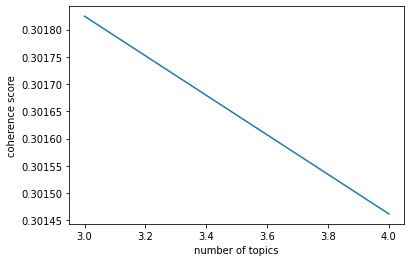

In [32]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=words_bigram, start=3, limit=5, step=1)

limit=5; start=3; step=1;
x = range(start, limit, step)
topic_num = 0
count = 0
max_coherence = 0
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", cv,)
    coherence = cv
    if coherence >= max_coherence:
        max_coherence = coherence
        topic_num = m
        model_list_num = count   
    count = count+1
# 높은값이 최적~!~!

plt.plot(x, coherence_values)
plt.xlabel("number of topics")
plt.ylabel("coherence score")
plt.show()
                
# Select the model and print the topics
optimal_model = model_list[model_list_num]
model_topics = optimal_model.show_topics(formatted=False)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.8/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(El

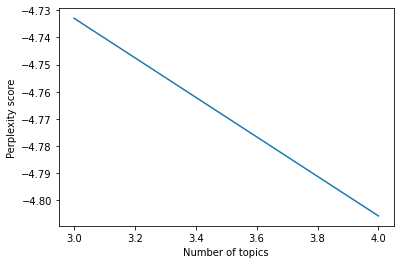

In [33]:
perplexity_values = []
for i in range(3,5): # 2~8 하이퍼 파라미터를 변경하면서 점수 계산
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=i, id2word = id2word)
    perplexity_values.append(ldamodel.log_perplexity(corpus)) 

x = range(3,5)
plt.plot(x, perplexity_values)
plt.xlabel("Number of topics")
plt.ylabel("Perplexity score")
plt.show()

In [34]:
gensim_model = gensim.models.wrappers.ldamallet.malletmodel2ldamodel(optimal_model)

In [35]:
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(gensim_model, corpus, id2word)
vis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.8/dist-packages/pyLDAvis/_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.000912 -0.000005       1        1  33.362950
2      0.000461 -0.000594       2        1  33.325871
1      0.000450  0.000599       3        1  33.311179, topic_info=     Term       Freq      Total Category  logprob  loglift
9    숙박업소  45.000000  45.000000  Default  30.0000  30.0000
69     무료  45.000000  45.000000  Default  29.0000  29.0000
80     정리  46.000000  46.000000  Default  28.0000  28.0000
117    식당  46.000000  46.000000  Default  27.0000  27.0000
70     정렬  45.000000  45.000000  Default  26.0000  26.0000
..    ...        ...        ...      ...      ...      ...
106   호캉스  16.492653  49.024662   Topic3  -4.8826   0.0099
97     특가  16.352267  48.474121   Topic3  -4.8911   0.0126
127  여자친구  16.221805  47.501300   Topic3  -4.8991   0.0249
124    광고  16.200875  47.631662   Topic3  -4.9004   0.0208
34     필터  16.178200  48.028247   Topic3  -4.9018   0.0112

[150 rows x 6 columns], token_table=      Topic      Freq Term
term                      
86        1  0.290380   개선
86        2  0.352605   개선
86        3  0.352605   개선
85        1  0.315096   개인
85        2  0.315096   개인
...     ...       ...  ...
138       2  0.322887   환불
138       3  0.344413   환불
37        1  0.362842   후기
37        2  0.341498   후기
37        3  0.320155   후기

[312 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 3, 2])

In [36]:
def format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    #ldamodel[corpus]: lda_model에 corpus를 넣어 각 토픽 당 확률을 알 수 있음
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num,topn=20)                            #이거 숫자 바꿈
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']
    print(type(sent_topics_df))

    # Add original text to the end of the output
    #contents = pd.Series(texts)
    #sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    sent_topics_df = pd.concat([sent_topics_df, topic_3['text']], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=optimal_model, corpus=corpus, texts=words_bigram)

# Format
df_topic_review = df_topic_sents_keywords.reset_index()
df_topic_review.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'text']

# Show각 문서에 대한 토픽
df_dominant_topic=df_topic_review.sort_values(by=['Dominant_Topic'])
df_dominant_topic

/usr/local/lib/python3.8/dist-packages/smart_open/smart_open_lib.py:496: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)
/usr/local/lib/python3.8/dist-packages/smart_open/smart_open_lib.py:496: DeprecationWarning: This function is deprecated.  See https://github.com/RaRe-Technologies/smart_open/blob/develop/MIGRATING_FROM_OLDER_VERSIONS.rst for more information
  warnings.warn(message, category=DeprecationWarning)


<class 'pandas.core.frame.DataFrame'>


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,text
0,0,0.0,0.3522,"검색, 지역, 결제, 필터, 위치, 선택, 지도, 옵션, 기능, 지역별, 인터페이스...",쉬운 예약 설정 많은 숙소 검색됨 빠른 검색 빠른 예약 확정 맘에 듭니다
466,466,0.0,0.3642,"검색, 지역, 결제, 필터, 위치, 선택, 지도, 옵션, 기능, 지역별, 인터페이스...",나쁘지 않네요 근데 정렬 기능이 베타라 그런 가 검색 부분으로 들어가면 상세 검색이...
467,467,0.0,0.3333,"검색, 지역, 결제, 필터, 위치, 선택, 지도, 옵션, 기능, 지역별, 인터페이스...",사용 자 리뷰 확인 이용이 추천 호텔에서 실망한 적거의 없음 지역에 따라 호텔 수에...
468,468,0.0,0.3512,"검색, 지역, 결제, 필터, 위치, 선택, 지도, 옵션, 기능, 지역별, 인터페이스...",출장으로 숙소를 자주 이용하는데 저렴한 가격에 원하는 숙소를 찾을 수 있어서 좋습니...
469,469,0.0,0.3642,"검색, 지역, 결제, 필터, 위치, 선택, 지도, 옵션, 기능, 지역별, 인터페이스...",숙박 검색 시 많은 곳들이 비교 가능하고 다양한 선택 옵션이 있어서 좋습니다
...,...,...,...,...,...
1127,1127,2.0,0.3758,"보기, 추천, 할인, 레스토랑, 이벤트, 정보, 프로모션, 출장, 한눈, 정리, 직...",여러 어플 많이 봤지만 제일 보기 깔끔하고 편합니다 한눈에 정보가 딱 들어오고 여러...
453,453,2.0,0.3522,"보기, 추천, 할인, 레스토랑, 이벤트, 정보, 프로모션, 출장, 한눈, 정리, 직...",직관적이어서 편리해요 할인되는 객실이 더 많아졌으면 좋겠어요
454,454,2.0,0.3711,"보기, 추천, 할인, 레스토랑, 이벤트, 정보, 프로모션, 출장, 한눈, 정리, 직...",잘 정리해서 고객에게 추천을 함
1137,1137,2.0,0.3642,"보기, 추천, 할인, 레스토랑, 이벤트, 정보, 프로모션, 출장, 한눈, 정리, 직...",화면이 깔끔하고 군더더기 없어서 좋아요 메뉴도 간편하고 복잡한 프로모션 없이도 저렴...


In [37]:
# Group top 5 sentences under each topic
sent_topics_sorteddf_mallet = pd.DataFrame()

sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=[0]).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)


topic_counts = df_topic_sents_keywords['Dominant_Topic'].value_counts()
topic_counts.sort_index(inplace=True)

topic_contribution = round(topic_counts/topic_counts.sum(), 4)
topic_contribution

lda_inform = pd.concat([sent_topics_sorteddf_mallet, topic_counts, topic_contribution], axis=1)
lda_inform.columns=["Topic_Num", "Topic_Perc_Contrib", "Keywords", "text", "Num_Documents", "Perc_Documents"]
lda_inform = lda_inform[["Topic_Num", "Keywords","Num_Documents","Perc_Documents"]]
lda_inform
#lda_inform.Topic_Num = lda_inform.Topic_Num.astype(int)
lda_inform['Topic_Num'] =lda_inform['Topic_Num'] +1
lda_inform.Topic_Num = lda_inform.Topic_Num.astype(str)
lda_inform['Topic_Num'] =lda_inform['Topic_Num'].str.split('.').str[0]
df_topic_review['Dominant_Topic'] =df_topic_review['Dominant_Topic'] +1
df_topic_review.Dominant_Topic = df_topic_review.Dominant_Topic.astype(str)
df_topic_review['Dominant_Topic'] =df_topic_review['Dominant_Topic'].str.split('.').str[0]

In [38]:
lda_inform.to_csv ("./lda_inform.csv", index = None, encoding="CP949")
lda_inform

,Topic_Num,Keywords,Num_Documents,Perc_Documents
0.0,1,"검색, 지역, 결제, 필터, 위치, 선택, 지도, 옵션, 기능, 지역별, 인터페이스...",578,0.4017
1.0,2,"가격, 비교, 애용, 찾기, 쿠폰, 최저가, 리뷰, 숙박시설, 계획, 장점, 사이트...",453,0.3148
2.0,3,"보기, 추천, 할인, 레스토랑, 이벤트, 정보, 프로모션, 출장, 한눈, 정리, 직...",408,0.2835
